> # Cloud Vision API

- 사용하기에 앞서 Cloud Vision API 활성화와 클라이언트 생성을 선행
- 활성화는 console에서 API 사용 설정 가능
- 클라이언트는 `google.cloud.vision`을 통해 생성

In [1]:
!pip install --upgrade google-cloud-vision

  Using cached https://files.pythonhosted.org/packages/1d/85/51847141b391016c910a7abaf3c617122c7832312d84c0abf29e0fc85ba0/google_cloud_vision-0.34.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a5/be/de30100034c391f4c56e2543f1507eb1b30b3030bd9a6764dd6cfe7a954e/google_api_core-1.4.1-py2.py3-none-any.whl
google-cloud-monitoring 0.28.0 has requirement google-api-core<0.2.0dev,>=0.1.1, but you'll have google-api-core 1.4.1 which is incompatible.
  Found existing installation: google-api-core 0.1.4
    Uninstalling google-api-core-0.1.4:
      Successfully uninstalled google-api-core-0.1.4


In [1]:
from google.cloud import vision
from google.cloud.vision import types

- client 인스턴스 만들기

In [2]:
client = vision.ImageAnnotatorClient()


> ## 레이블 검출하기
#### 이미지 지정하고 API 호출하기
- API에 이미지를 전송하려면 로컬 파일을 인코딩해서 요청 매개변수를 포함시키거나, 파일 경로를 지정해야 함
- 라이브러리를 사용하면 별도의 처리를 따로 하지 않아도 됨
- **아래는 로컬파일 또는 GCS 사용 시 API 호출하는 방법임**

In [4]:
# local 파일 사용 시
import io
with io.open('gcpml-book/Part1/seagull.jpg', 'rb') as image_file:
  content = image_file.read()

image = types.Image(content=content)

In [7]:
# GCS 사용시
image = types.Image()
image.source.image_uri = 'gcpml-book/Part1/seagull.jpg'

___
#### 레이블 검출하고 실행하기
- `client`객체에 `label_detection`메서드를 호출하면 API에 요청
- 성공 시 레이블 정보가 리스트로 반환

- 아래와 같이 API에 요청

In [9]:
response = client.label_detection(image = image)

- 반환된 객체에 label_annotations를 보면 다양한 정보가 포함되어 있음

In [11]:
labels = response.label_annotations
labels[0]

mid: "/m/015p6"
description: "bird"
score: 0.9799333214759827
topicality: 0.9799333214759827

- for문을 사용하여 중요 정보를 요약

In [12]:
print ('Labels:')

for i in labels:
  print('Score: {}, Label: {}'.format(round(i.score, 2), i.description))

Labels:
Score: 0.98, Label: bird
Score: 0.94, Label: water
Score: 0.92, Label: seabird
Score: 0.88, Label: beak
Score: 0.87, Label: fauna
Score: 0.84, Label: gull
Score: 0.72, Label: water bird
Score: 0.72, Label: charadriiformes
Score: 0.65, Label: european herring gull
Score: 0.51, Label: feather


> ## 얼굴 검출하기

- 이전과 마찬가지로 클라이언트를 만들고 이미지를 읽어와서 `image` 객체를 생성
- 이번에는 `face_detection`을 통해 API를 요청

In [5]:
with io.open('gcpml-book/Part1/face.jpg', 'rb') as image_file:
  content = image_file.read()
image = types.Image(content=content)

In [6]:
response = client.face_detection(image=image)
faces = response.face_annotations

- 반환된 결과는 얼굴 주요 부위의 좌표, 감정, 특징 등의 정보가 포함되어 있음
```
face[0]
>bounding_poly {
>  vertices {
>    x: 512
>    y: 260
>  }
>  vertices {
>    x: 671
>    y: 260
>  }
>  vertices {
>    x: 671
>    y: 445
>  }
>  vertices {
>    x: 512
>    y: 445
>  }
>}
>.
>.
>.
>under_exposed_likelihood: VERY_UNLIKELY
>blurred_likelihood: VERY_UNLIKELY
>headwear_likelihood: VERY_UNLIKELY
```

- 감정은 카테고리 값(int)를 출력하기에 이에 대응하는 튜플 생성 선행

In [15]:
faces[0].joy_likelihood

5

In [16]:
likelihood_lists = ['Unknown', 'Very_unlikely', 'Unlikely', 'Possible', 'Likely', 'Very_likely']
print('first face demonstrates "{} joy"'.format(likelihood_lists[faces[0].joy_likelihood]))

first face demonstrates "Very_likely joy"


- 검출된 얼굴들의 감정을 모두 출력하자면 다음과 같이 가능

In [17]:
for i in range(len(faces)):
  print('face'+str(i+1)+' '+'='*18)
  print('JOY: '+ likelihood_lists[faces[i].joy_likelihood])
  print('ANGER: '+ likelihood_lists[faces[i].anger_likelihood])
  print('SORROW: '+ likelihood_lists[faces[i].sorrow_likelihood])
  print('SURPRISE: '+ likelihood_lists[faces[i].surprise_likelihood]+'\n')

face1 ==================
JOY: Very_likely
ANGER: Very_unlikely
SORROW: Very_unlikely
SURPRISE: Very_unlikely

face2 ==================
JOY: Very_likely
ANGER: Very_unlikely
SORROW: Very_unlikely
SURPRISE: Very_unlikely

face3 ==================
JOY: Very_likely
ANGER: Very_unlikely
SORROW: Very_unlikely
SURPRISE: Very_unlikely

face4 ==================
JOY: Very_likely
ANGER: Very_unlikely
SORROW: Very_unlikely
SURPRISE: Very_unlikely

face5 ==================
JOY: Possible
ANGER: Very_unlikely
SORROW: Very_unlikely
SURPRISE: Very_unlikely



- `labels`에 포함된 정보로 얼굴의 요소를 추출할 수도 있으며, 이를 통해 이미지 위에 그림 그리는 것도 가능

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

(-0.5, 1199.5, 799.5, -0.5)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


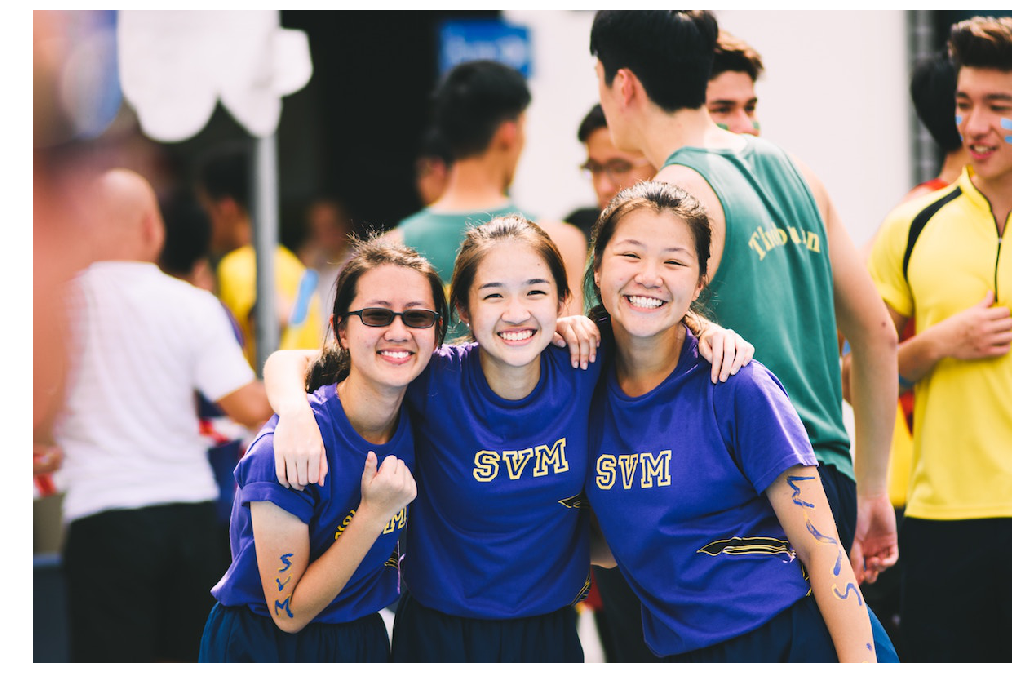

In [8]:
plt.figure(figsize = (20, 12))
im = Image.open('gcpml-book/Part1/face.jpg', 'r')
plt.imshow(np.asarray(im))
plt.axis('off')

- 얼굴의 윤곽 정보는 `bounding_poly.vertices`에 위치해 있으며 4쌍의 좌표로 구성되어 있음
- `landmarks`에는 얼굴의 주요 요소(눈, 코, 입 등) 정보가 저장되어 있고, 각각 1쌍의 좌표로 구성

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


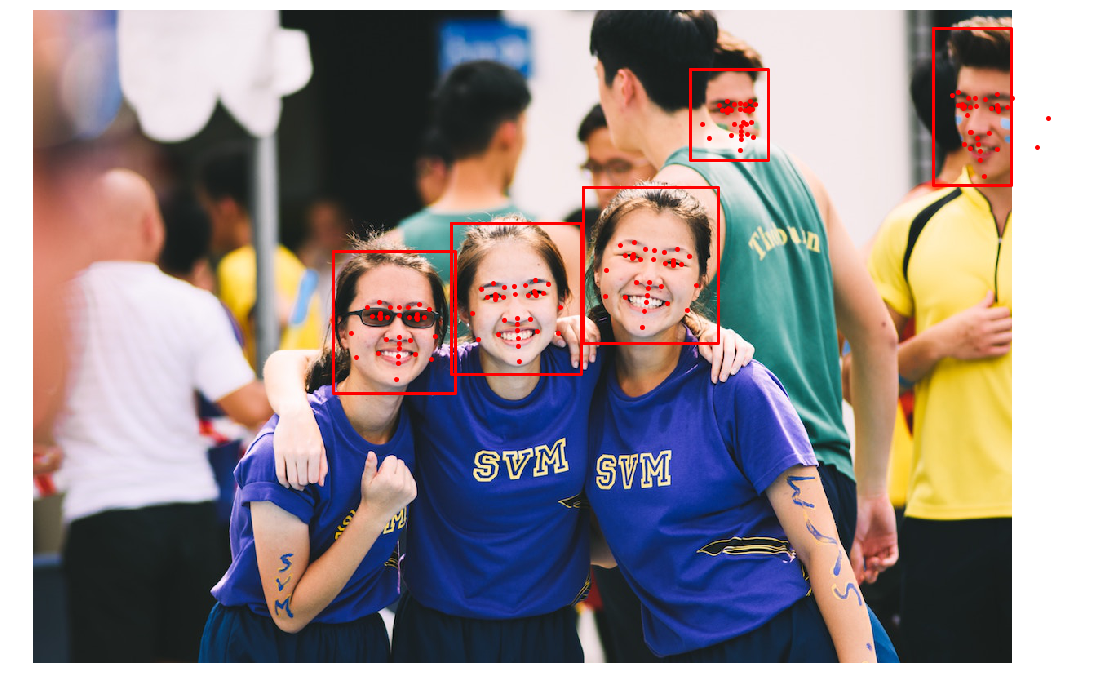

In [9]:
plt.figure(figsize = (20, 12))
im = Image.open('gcpml-book/Part1/face.jpg', 'r')
plt.imshow(np.asarray(im))
plt.axis('off')


# 그래프 그리기
for face in faces:
  # 박스 그리기
  bbox_x = [v.x for v in face.bounding_poly.vertices]
  bbox_y = [v.y for v in face.bounding_poly.vertices]
  bbox_x.append(bbox_x[0])
  bbox_y.append(bbox_y[0])
  plt.plot(bbox_x, bbox_y, 'r-', linewidth = 3)
  # 각 요소에 점 찍기
  for landmark in face.landmarks:
    plt.plot(landmark.position.x, landmark.position.y, 'ro', markersize = 5)

- `landmark`에는 상당히 많은 수의 얼굴 요소 정보가 포함
- 특정 요소만 추출하고 싶다면 `google.clod.vision.enums` 사용
- 참고. `landmark`의 LEFT는 사진을 보는 사람 입장에서의 LEFT며, 이는 RIGHT 결과값을(주인공 입장) 반환


In [10]:
from google.cloud.vision import enums
faces[0].landmarks[enums.FaceAnnotation.Landmark.Type.LEFT_EYE]

type: RIGHT_EYE
position {
  x: 615.593994140625
  y: 345.97039794921875
  z: -0.1632108837366104
}

___
> ### 랜드마크 검출

- 사람 얼굴 외에도 사진으로 유명 장소를 판별해서 '지명'과 '좌표'를 반환하는 기능도 있음
- `landmark_detection()`을 통해 API 호출

In [13]:
with io.open('gcpml-book/Part1/sydney.jpg', 'rb') as image_file:
  content = image_file.read()
image = types.Image(content = content)

client = vision.ImageAnnotatorClient()
response = client.landmark_detection(image=image)
landmarks = response.landmark_annotations

In [14]:
print('Landmarks: \n')
for landmark in landmarks:
  print(landmark.description)
  print(landmark.locations[0].lat_lng.latitude, landmark.locations[0].lat_lng.longitude)
print()

Landmarks: 

Sydney
-33.857765 151.21450099999998
Sydney Opera House
-33.857123 151.213921



- `description`에는 랜드마크의 명칭이, `locations`에는 좌표 정보가 들어 있음
- 사각형으로 표시하는 방법은 얼굴과 동일한 방식으로 수행

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


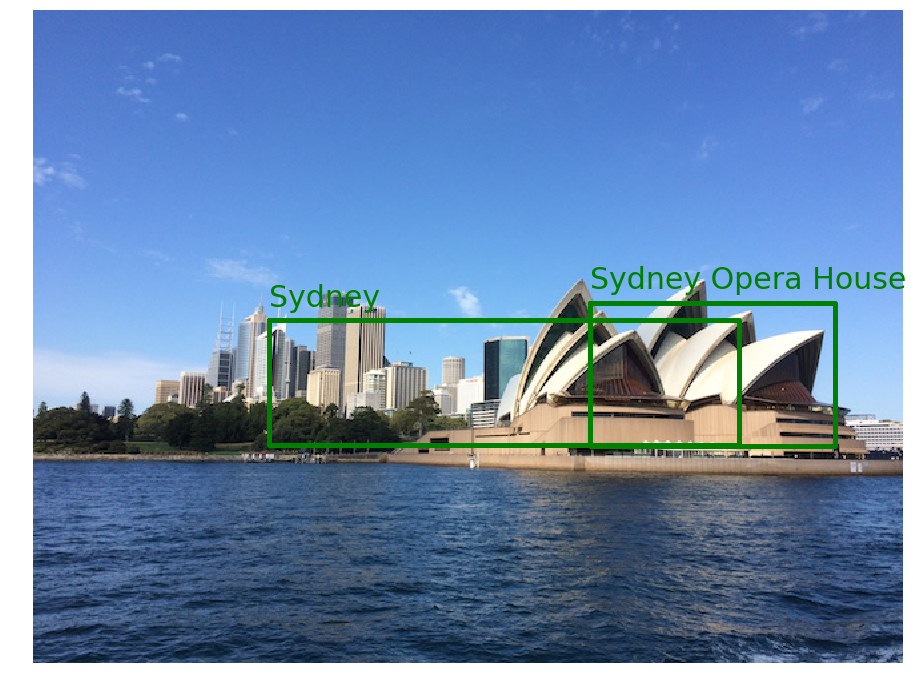

In [16]:
im = Image.open('gcpml-book/Part1/sydney.jpg', 'r')
plt.figure(figsize = (20,12))
plt.imshow(np.asarray(im))
plt.axis('off')

for landmark in landmarks:
  bbox_x = [v.x for v in landmark.bounding_poly.vertices]
  bbox_y = [v.y for v in landmark.bounding_poly.vertices]
  bbox_x.append(bbox_x[0])
  bbox_y.append(bbox_y[0])
  
  plt.plot(bbox_x, bbox_y, 'g-', linewidth = 5)
  plt.text(bbox_x[0], bbox_y[0]-10, landmark.description, color = 'g', fontsize = 30)

___
> ## OCR(텍스트 검출)

- `text_detection()`을 호출하면 이미지 내부에 있는 문자를 검출 (여러 언어 지원)

In [18]:
with io.open('gcpml-book/Part1/text.jpg', 'rb') as image_file:
  content = image_file.read()
image = types.Image(content = content)

response = client.text_detection(image=image)

In [20]:
texts = response.text_annotations
for text in texts:
  print(text.description)

YCAT
横浜シティ·エア·ターミナル
(空港行きバス·高速バス)
Airport Bus-Expressway Bus /공항버스 고속버스
機場巴士·高速巴士/机场大巴,高速巴士

YCAT
横浜
シティ
·
エア
·
ターミナル
(
空港
行き
バス
·
高速
バス
)
Airport
Bus
-
Expressway
Bus
/
공항
버스
고속
버스
機場
巴士
·
高速
巴士
/
机场
大巴
,
高速
巴士


- `text_annotations()`는 모든 텍스트를 한번에 출력 후 단어 단위로 결과 값 출력
- `bounding_ploy` 내에는 마찬가지로 단어의 위치 정보가 담겨 있음

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


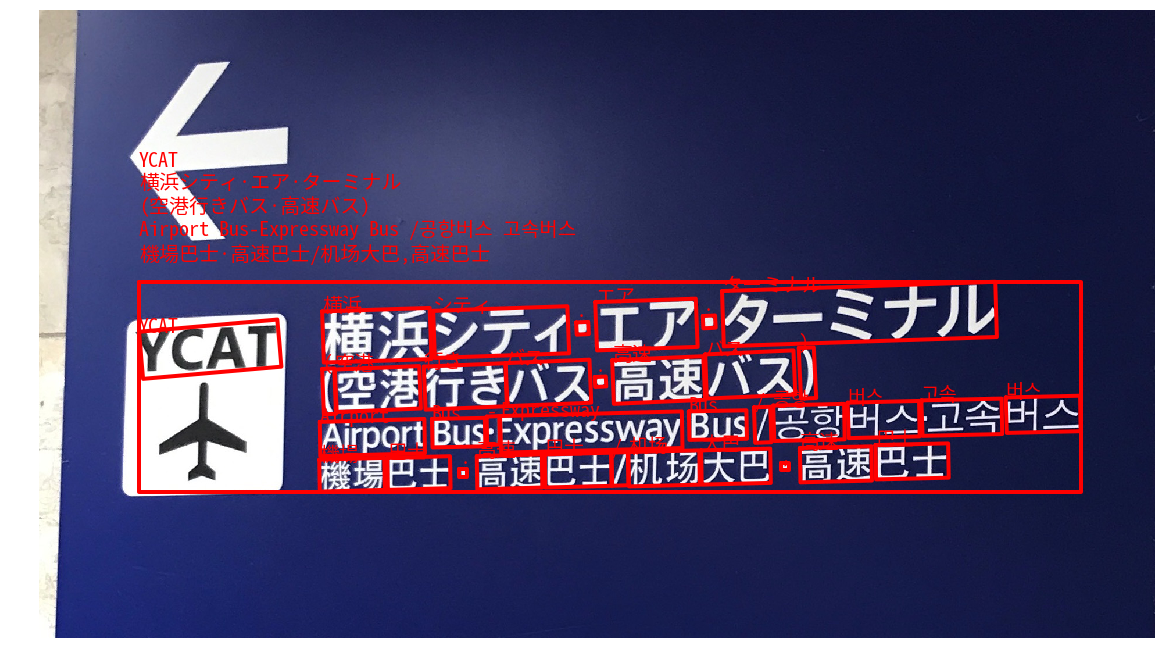

In [33]:
# 폰트 정보 읽어오기
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname = r'gcpml-freelec/Part1/NotoSansMonoCJKjp-Regular.otf', size = 20)

# 이하 동일
im = Image.open('gcpml-book/Part1/text.jpg', 'r')
plt.figure(figsize = (20,12))
plt.imshow(im)
plt.axis('off')

for text in texts:
  bbox_x = [v.x for v in text.bounding_poly.vertices]
  bbox_y = [v.y for v in text.bounding_poly.vertices]
  bbox_x.append(bbox_x[0])
  bbox_y.append(bbox_y[0])
  
  plt.plot(bbox_x, bbox_y, 'r-', linewidth = 4)
  plt.text(bbox_x[0], bbox_y[0], text.description, color = 'r', fontproperties = fp, fontsize = 100)